## 1. Importing libraries

In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## 2. Loading datasets

In [ ]:
playstore = pd.read_csv('playstore.csv')
reviews = pd.read_csv('playstore_user_reviews.csv')

## 3. Diplaying dataset info

In [ ]:
print(f'Playstore head: {playstore.head()}')
print(f'Reviews head: {reviews.head()}')
print(f'Playstore number of cols: {len(playstore.columns)}')
print(f'Reviews number of cols: {len(reviews.columns)}')
print(f'Playstore number of rows: {len(playstore.index)}')
print(f'Reviews number of rows: {len(reviews.index)}')
print(f'Playstore shape: {playstore.shape}')
print(f'Reviews shape: {reviews.shape}')
# we could also use df.info()/df.describe()

Playstore head:                                                  App  ...   Android Ver
0     Photo Editor & Candy Camera & Grid & ScrapBook  ...  4.0.3 and up
1                                Coloring book moana  ...  4.0.3 and up
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ...  4.0.3 and up
3                              Sketch - Draw & Paint  ...    4.2 and up
4              Pixel Draw - Number Art Coloring Book  ...    4.4 and up

[5 rows x 13 columns]
Reviews head:                      App  ... Sentiment_Subjectivity
0  10 Best Foods for You  ...               0.533333
1  10 Best Foods for You  ...               0.288462
2  10 Best Foods for You  ...                    NaN
3  10 Best Foods for You  ...               0.875000
4  10 Best Foods for You  ...               0.300000

[5 rows x 5 columns]
Playstore number of cols: 13
Reviews number of cols: 5
Playstore number of rows: 10841
Reviews number of rows: 64295
Playstore shape: (10841, 13)
Reviews shape: (64295, 5)


## 4. Merging datasets

In [ ]:
df = pd.merge(playstore, reviews, how='inner', on="App")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,I love colors inspyering,Positive,0.500,0.600000


## 5. Calculating statistics

In [ ]:
#Average, Min, Max, Range, Variance, Standard Deviation
#for
#Rating, Reviews, Size, Installs, Sentiment_Polarity, Sentiment_Subjectivity

playstore = pd.read_csv('playstore.csv')
reviews = pd.read_csv('playstore_user_reviews.csv')

print(f'Rating mean: {playstore.Rating.mean()}')
print(f'Rating min: {playstore.Rating.min()}')
print(f'Rating max: {playstore.Rating.max()}')
print(f'Rating range: [{playstore.Rating.min()},{playstore.Rating.max()}]')
print(f'Rating variance: {playstore.Rating.var()}')
print(f'Rating standard deviation: {playstore.Rating.std()}')

# some Rating has value '3.0M', it is an error so we remove it
playstore = playstore.drop(playstore[playstore.Reviews.str.contains('M')].index)
# convert Rating to int because some were of different type and there was an error
playstore.Reviews = playstore.Reviews.astype(int) 

print(f'Reviews mean: {playstore.Reviews.mean()}')
print(f'Reviews min: {playstore.Reviews.min()}')
print(f'Reviews max: {playstore.Reviews.max()}')
print(f'Reviews range: [{playstore.Reviews.min()},{playstore.Reviews.max()}]')
print(f'Reviews variance: {playstore.Reviews.var()}')
print(f'Reviews standard deviation: {playstore.Reviews.std()}')

# remove the 'M' from Size, from now on define base as M
playstore.Size = playstore.Size.str.rstrip('M')
# drop 'varies with device' from Size
playstore = playstore.drop(playstore[playstore.Size.str.contains('Varies with device')].index)
# remove the 'k' from Size and multiply by 0.001 to compy with base 'M'
playstore.loc[playstore.Size.str.contains('k'), 'Size'] = playstore.Size.str.rstrip('k').astype(float)  * 0.001
# make sure everything is converted to float in Size
playstore.Size = playstore.Size.astype(float) 

print(f'Size mean: {playstore.Size.mean()}')
print(f'Size min: {playstore.Size.min()}')
print(f'Size max: {playstore.Size.max()}')
print(f'Size range: [{playstore.Size.min()},{playstore.Reviews.max()}]')
print(f'Size variance: {playstore.Size.var()}')
print(f'Size standard deviation: {playstore.Size.std()}')

# remove '+' after numbers from Installs
playstore.Installs = playstore.Installs.str.rstrip('+')
# remove the ',' between numbers from Installs
playstore.Installs  = playstore.Installs.str.replace(',', '')
# remove a row that has 'Free' in Installs
playstore = playstore.drop(playstore[playstore.Installs.str.contains('Free')].index)
# convert Installs to int
playstore.Installs = playstore.Installs.astype(int)

print(f'Installs mean: {playstore.Installs.mean()}')
print(f'Installs min: {playstore.Installs.min()}')
print(f'Installs max: {playstore.Installs.max()}')
print(f'Installs range: [{playstore.Installs.min()},{playstore.Installs.max()}]')
print(f'Installs variance: {playstore.Installs.var()}')
print(f'Installs standard deviation: {playstore.Installs.std()}')

# deal with NaNs
reviews = reviews.dropna()

print(f'Sentiment_Polarity mean: {reviews.Sentiment_Polarity.mean()}')
print(f'Sentiment_Polarity min: {reviews.Sentiment_Polarity.min()}')
print(f'Sentiment_Polarity max: {reviews.Sentiment_Polarity.max()}')
print(f'Sentiment_Polarity range: [{reviews.Sentiment_Polarity.min()},{reviews.Sentiment_Polarity.max()}]')
print(f'Sentiment_Polarity variance: {reviews.Sentiment_Polarity.var()}')
print(f'Sentiment_Polarity standard deviation: {reviews.Sentiment_Polarity.std()}')

print(f'Sentiment_Subjectivity mean: {reviews.Sentiment_Subjectivity.mean()}')
print(f'Sentiment_Subjectivity min: {reviews.Sentiment_Subjectivity.min()}')
print(f'Sentiment_Subjectivity max: {reviews.Sentiment_Subjectivity.max()}')
print(f'Sentiment_Subjectivity range: [{reviews.Sentiment_Subjectivity.min()},{reviews.Sentiment_Subjectivity.max()}]')
print(f'Sentiment_Subjectivity variance: {reviews.Sentiment_Subjectivity.var()}')
print(f'Sentiment_Subjectivity standard deviation: {reviews.Sentiment_Subjectivity.std()}')

Rating mean: 4.193338315362448
Rating min: 1.0
Rating max: 19.0
Rating range: [1.0,19.0]
Rating variance: 0.28883240560309886
Rating standard deviation: 0.5374313031477594
Reviews mean: 444152.89603321033
Reviews min: 0
Reviews max: 78158306
Reviews range: [0,78158306]
Reviews variance: 8571782153664.839
Reviews standard deviation: 2927760.6038856455
Size mean: 21.516529524330146
Size min: 0.0085
Size max: 100.0
Size range: [0.0085,44893888]
Size variance: 510.2515332322873
Size standard deviation: 22.588747934143832
Installs mean: 7114842.368944778
Installs min: 0
Installs max: 1000000000
Installs range: [0,1000000000]
Installs variance: 2133845569640074.0
Installs standard deviation: 46193566.323028944
Sentiment_Polarity mean: 0.18217064737425215
Sentiment_Polarity min: -1.0
Sentiment_Polarity max: 1.0
Sentiment_Polarity range: [-1.0,1.0]
Sentiment_Polarity variance: 0.12342443463544636
Sentiment_Polarity standard deviation: 0.351318138779435
Sentiment_Subjectivity mean: 0.4927697503

## 6. “Angry Birds Classic” Sentiment

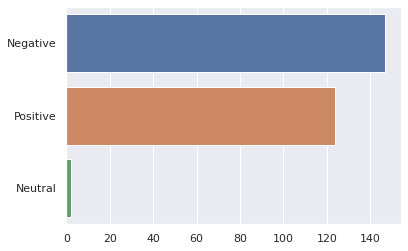

In [ ]:
# from the reviews of ABC get distinct value counts
counts = reviews[reviews.App.str.contains('Angry Birds Classic')].Sentiment.value_counts()
sn.set_theme(style="darkgrid")
sn.barplot(y=counts.index, x=counts.values)

## 7. Top 20 words in “Angry Birds Classic” reviews

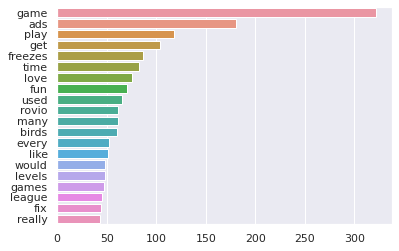

In [ ]:
# helper function to check whether input is int
def is_number(s): 
    try:
        int(s)
        return True
    except ValueError:
        return False

# since we can't use other libs, so we must create a list with unique words and count them
words = []
unique = []
count_list = []
# this is not efficient and there are libs that do it optimally
# ideally we would use collections.word_counter or tokenization from scipy
useless = ['the', 'a', 'i', 'it', 'im', 'you', 'we', 'us', 'ive','and', 
           'of', 'my', 'me', 'its', 'is', 'so', 'in', 'if', 'too', 'this', 'but']
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
for line in reviews[reviews.App.str.contains('Angry Birds Classic')].Translated_Review.values:
  # for every review(line) de-capitalize and split into words
  for w in line.lower().split():
    # search for punctioation and remove it
    for c in w:
      if c in punc:
        w = w.replace(c, "")
    if is_number(w):
      continue
    # also remove empty words
    elif w is "":
      continue
    # also remove words with no meaning
    elif w in useless:
      continue
    words.append(w)
    if w not in unique:
      unique.append(w)
# create list with unique words and their frequency of appearance
for u in unique:
  count = 0
  for w in words:
    if w == u:
      count += 1
  count_list.append((count, u))

count_list.sort()
count_list.reverse()
res = pd.Series(dtype=pd.StringDtype())
# get top 20 from most frequent list count_list
for i in range(min(20, len(count_list))):
  count, w = count_list[i]
  res[w] = count

sn.barplot(y=res.index, x=res.values)

## 8. How to handle NaNs
- Removing them: `df.dropna()`. This is the most common approach, but can lead to a lot smaller dataset.
- Replacing them with some value: 0: `df.fillna(0)`, Imputing: random/ mean/ prediction etc. Replacing them with 0 is not common, because most of the times that does not take into account the range of the data. Imputing with some value is the preferred approach, even more so if one can train a network on full data to produce predictions for values to be filled in.

## 9. NaN handling

In [ ]:
# we will use the reviews dataset because it has more missing values

# set to 0
reviews = pd.read_csv('playstore_user_reviews.csv')
reviews.fillna(0)

# remove them
reviews = pd.read_csv('playstore_user_reviews.csv')
reviews.dropna()

# replace with mean
reviews = pd.read_csv('playstore_user_reviews.csv')
reviews.Sentiment_Polarity = reviews.Sentiment_Polarity.fillna(reviews.Sentiment_Polarity.mean())
reviews.Sentiment_Subjectivity = reviews.Sentiment_Subjectivity.fillna(reviews.Sentiment_Subjectivity.mean())

## 10. App description through datapoints

In [ ]:
def description(name):
  playstore = pd.read_csv('playstore.csv')
  reviews = pd.read_csv('playstore_user_reviews.csv')
  playstore = playstore.dropna()
  reviews = reviews.dropna()

  data = playstore[playstore.App.str.contains(name)].iloc[0]
  print(f'{name} is a {data.Category} app that is {data.Type} and costs {data.Price}$, made for {data["Content Rating"]}.')
  print(f'It has {data.Installs} downloads, works for {data["Android Ver"]} Android and will take up {data.Size} of space.')
  data = reviews[reviews.App.str.contains(name)]
  print(f'The prevalent sentiment in the reviews is {data.Sentiment.value_counts().idxmax()}, with a mean of {data.Sentiment_Polarity.mean():.4f} from [{reviews.Sentiment_Polarity.min()},{reviews.Sentiment_Polarity.max()}], -1 being Negative and 1 Positive.')
  
  print('Figures:')
  fig, ax = plt.subplots(1,3, figsize=(20, 6))
  
  sn.histplot(data.Sentiment_Polarity, ax=ax[0], kde=True).set_title('Sentiment Polarity of {}'.format(name))
  sn.histplot(data.Sentiment_Subjectivity, ax=ax[1], color='black', kde=True).set_title('Sentiment Subjectivity of {}'.format(name))
  
  sn.histplot(reviews.groupby('App').Sentiment_Polarity.mean(), color='green', ax=ax[2], label='apps').set_title('Sentiment All vs {}'.format(name))
  sn.histplot(reviews[reviews.App.str.contains(name)].Sentiment_Polarity, color='red', ax=ax[2], label=name)
  plt.title('mean Sentiment distribution in apps vs {}'.format(name))
  plt.xlabel('Sentiment Polarity')
  plt.ylabel('Count')
  plt.legend()
  plt.show()

  fig, ax = plt.subplots(1,3, figsize=(20, 6))

  playstore.Installs = playstore.Installs.str.rstrip('+')
  playstore.Installs = playstore.Installs.str.replace(',', '')
  playstore = playstore.drop(playstore[playstore.Installs.str.contains('Free')].index)
  playstore.Installs = playstore.Installs.astype(int)

  sn.scatterplot(x=playstore.Rating, y=playstore.Installs, label='apps', ax=ax[0]).set_yscale("log")
  sn.scatterplot(x=playstore[playstore.App.str.contains(name)].Rating, y=playstore[playstore.App.str.contains(name)].Installs, color='red', label=name, ax=ax[0]).set_title('Installs vs Rating')

  playstore.Size = playstore.Size.str.rstrip('M')
  playstore = playstore.drop(playstore[playstore.Size.str.contains('Varies with device')].index)
  playstore.loc[playstore.Size.str.contains('k'), 'Size'] = playstore.Size.str.rstrip('k').astype(float)  * 0.001
  playstore.Size = playstore.Size.astype(float) 

  sn.scatterplot(x=playstore.Size, y=playstore.Installs, label='apps', ax=ax[1]).set_yscale("log")
  sn.scatterplot(x=playstore[playstore.App.str.contains(name)].Size, y=playstore[playstore.App.str.contains(name)].Installs, color='red', label=name, ax=ax[1]).set_title('Installs vs Size')

  plt.hist(playstore[playstore.App.str.contains(name)].Rating, bins=np.arange(0,5,0.1), color='r', label=name)
  n, bins, patches = plt.hist(playstore.Rating, bins=np.arange(0,5,0.1), color='g', label='Playstore Ratings')
  patches[int(playstore[playstore.App.str.contains(name)].Rating.iloc[0]*10)].set_fc('r')
  plt.title('Playstore ratings vs {} rating'.format(name))
  plt.xlabel('Rating')
  plt.ylabel('Count')

Angry Birds Classic is a GAME app that is Free and costs 0$, made for Everyone.
It has 100,000,000+ downloads, works for 4.1 and up Android and will take up 97M of space.
The prevalent sentiment in the reviews is Negative, with a mean of -0.0075 from [-1.0,1.0], -1 being Negative and 1 Positive.
Figures:


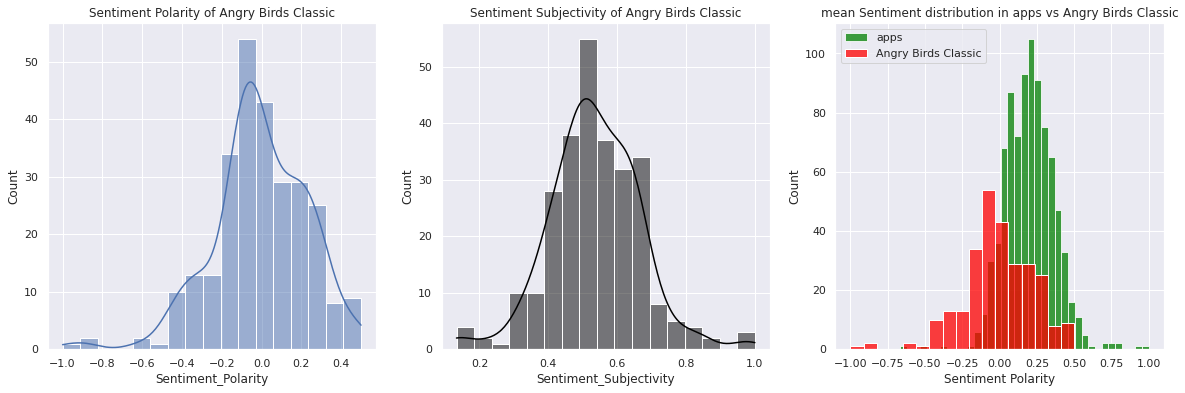

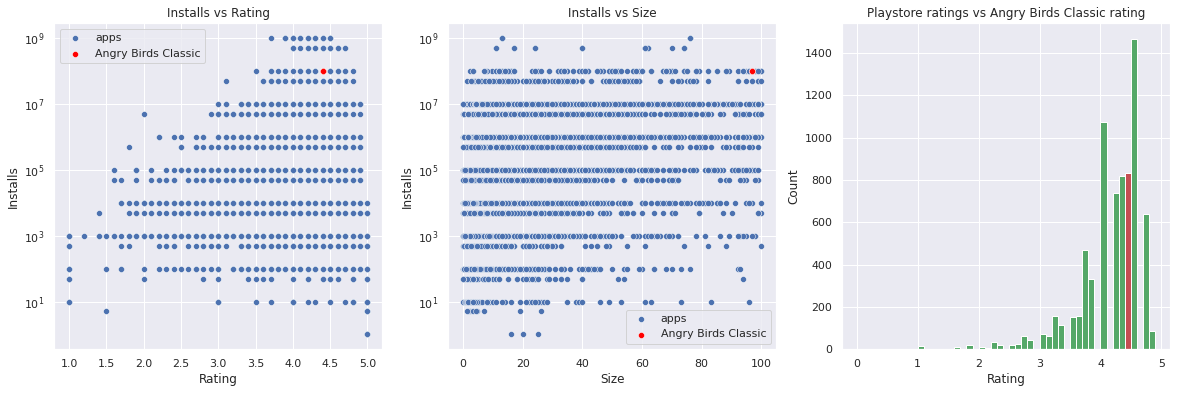

In [ ]:
description('Angry Birds Classic')

- plot[0][0] shows the distribution of sentiment polarity of Angry Birds Classic,
and we can infer that although the amount of people that have specifically slightly 
negative sentiment is the largest, cumulatively more people have good sentiment.
In essense, the distribution center is shifted to the left compared to a normal distribution.
- plot[0][1] shows the distribution of sentiment sunjectivity of Angry Birds Classic.
- plot[0][2] shows the distribution of sentiment polarity of Angry Birds Classic
compared to the distribution of means for all other apps in the playstore. We can see that 
the Angry Birds Classic distribution is shifted to the left, so more negativity is prevalent 
than is usual in the playstore.
- plot[1][0] shows the installs vs the app rating of Angry Birds Classic 
compared to all other apps in the playstore. We can see that 
Angry Birds Classic is one of the apps with the most installs as well as one 
with the highest ratings.
- plot[1][1] shows the installs vs the app size of Angry Birds Classic compared to all other apps in the playstore. We can see that 
Angry Birds Classic is one of the apps with the largest size for its category of installs
- plot[1][2] shows the distribution of ratings in the playstore and where Angry Birds Classic 
falls into. We can see that the rating is average, according to most other apps that fall into the 4.1-4.5 range.